In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from scipy.stats import multivariate_normal
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
def generate_correlated_clusters(n_samples,n_features,n_clusters,correlation=0.5,random_state=None):

    np.random.seed(random_state)

    X_blobs, y_blobs = make_blobs(n_samples=n_samples,centers=n_clusters,n_features=n_features,random_state=random_state)

    centers = np.array([X_blobs[y_blobs == i].mean(axis=0) for i in range(n_clusters)])

    X, y = [],[]

    for i, center in enumerate(centers):
    
        cov_matrix = np.full((n_features,n_features),correlation)  
        np.fill_diagonal(cov_matrix,1)  

        cluster_samples = np.random.multivariate_normal(mean=center,cov=cov_matrix,size=n_samples // n_clusters)

        X.append(cluster_samples)
        y.append(np.full(n_samples // n_clusters, i)) 

    X = np.vstack(X)
    y = np.hstack(y)

    return X, y

In [3]:
X, y = generate_correlated_clusters(n_samples=10000,n_features=10,n_clusters=3,correlation=1,random_state=42)
X = X + np.random.normal(scale=0,size=X.shape) 

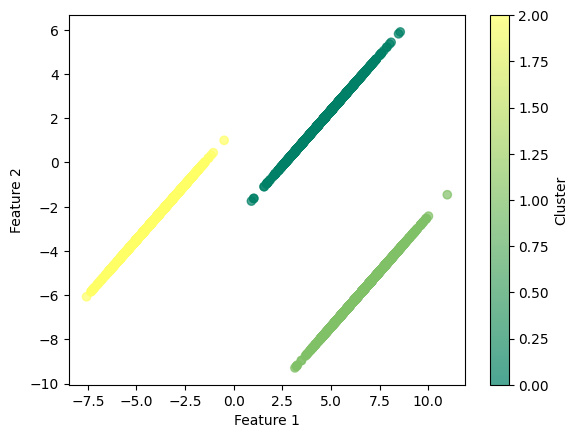

In [4]:
plt.scatter(X[:,2],X[:,3],c=y,cmap='summer',alpha=0.7)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Cluster")
plt.show()

In [12]:
cov_matrix = np.cov(X[:, 2], X[:, 3])
cov_xy = cov_matrix[0, 1]

std_x = np.std(X[:, 2], ddof=1) 
std_y = np.std(X[:, 3], ddof=1)

corr_xy = cov_xy / (std_x * std_y)

print("covariance:", cov_xy)
print("correlation:", corr_xy)

covariance: 0.15371674574655547
correlation: 0.009541661810113686


In [6]:
dataset = pd.DataFrame(X) 

In [7]:
dataset.columns = [f"vab_{col+1}" for col in dataset.columns]

In [8]:
dataset['target'] = y

In [9]:
dataset

,vab_1,vab_2,vab_3,vab_4,vab_5,vab_6,vab_7,vab_8,vab_9,vab_10,target
0,-2.979669,8.514865,4.139004,1.480930,-7.375675,-7.372050,-9.350983,6.814725,1.531261,3.656529,0
1,-2.019537,9.474997,5.099136,2.441061,-6.415543,-6.411918,-8.390851,7.774857,2.491392,4.616661,0
2,-3.948604,7.545930,3.170069,0.511995,-8.344609,-8.340985,-10.319918,5.845791,0.562326,2.687594,0
3,-1.881248,9.613286,5.237425,2.579350,-6.277254,-6.273629,-8.252562,7.913146,2.629681,4.754950,0
4,-3.221422,8.273112,3.897251,1.239177,-7.617427,-7.613802,-9.592736,6.572973,1.289508,3.414777,0
...,...,...,...,...,...,...,...,...,...,...,...
9994,1.353836,-8.077312,-5.062159,-3.571844,-1.759037,4.821513,-6.879575,-0.603837,0.989614,-9.955138,2
9995,1.557432,-7.873716,-4.858563,-3.368248,-1.555441,5.025109,-6.675979,-0.400241,1.193210,-9.751542,2
9996,0.851688,-8.579460,-5.564307,-4.073992,-2.261185,4.319365,-7.381723,-1.105985,0.487466,-10.457286,2
9997,2.233809,-7.197339,-4.182186,-2.691871,-0.879064,5.701486,-5.999602,0.276136,1.869587,-9.075165,2


In [10]:
dataset.iloc[:,:-1].corr()

,vab_1,vab_2,vab_3,vab_4,vab_5,vab_6,vab_7,vab_8,vab_9,vab_10
vab_1,1.000000,-0.762916,-0.812641,0.526622,0.762959,0.787246,-0.359782,0.145140,0.850370,-0.209854
vab_2,-0.762916,1.000000,0.984561,0.132906,-0.877298,-0.952078,-0.005924,0.517187,-0.327712,0.775095
vab_3,-0.812641,0.984561,1.000000,0.009542,-0.810305,-0.903583,0.169154,0.402065,-0.385434,0.673797
vab_4,0.526622,0.132906,0.009542,1.000000,-0.065871,-0.092279,-0.710663,0.916803,0.824310,0.720656
vab_5,0.762959,-0.877298,-0.810305,-0.065871,1.000000,0.982048,0.301555,-0.419111,0.501623,-0.697889
vab_6,0.787246,-0.952078,-0.903583,-0.092279,0.982048,1.000000,0.192955,-0.468671,0.450091,-0.748120
vab_7,-0.359782,-0.005924,0.169154,-0.710663,0.301555,0.192955,1.000000,-0.629330,-0.377630,-0.523739
vab_8,0.145140,0.517187,0.402065,0.916803,-0.419111,-0.468671,-0.629330,1.000000,0.572929,0.936095
vab_9,0.850370,-0.327712,-0.385434,0.824310,0.501623,0.450091,-0.377630,0.572929,1.000000,0.254640
vab_10,-0.209854,0.775095,0.673797,0.720656,-0.697889,-0.748120,-0.523739,0.936095,0.254640,1.000000


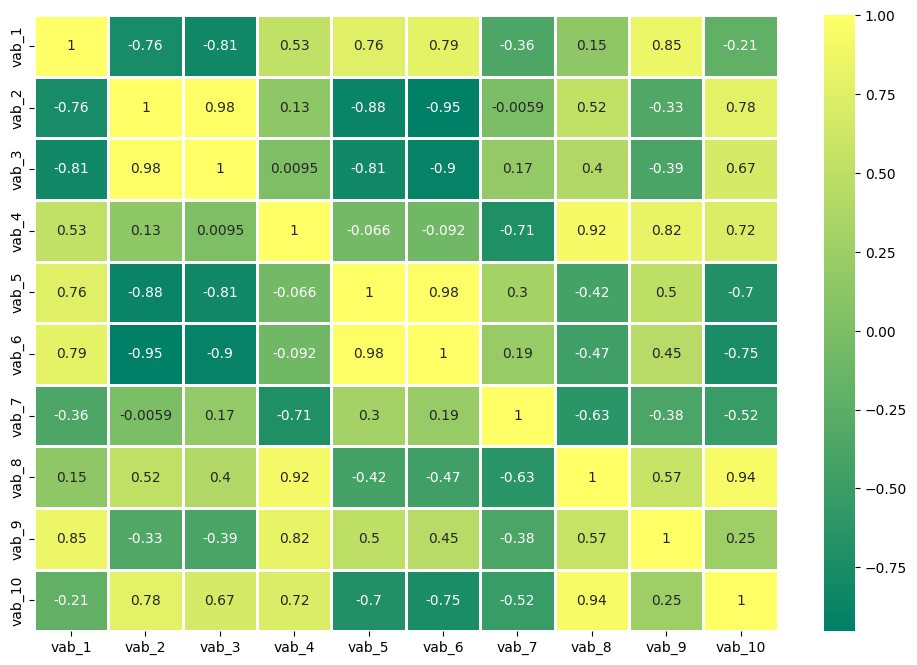

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(dataset.iloc[:,:-1].corr(),cmap='summer',annot=True,linewidths=1)
plt.show()